# Healthcare Readmission 30_days

* Importing the liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



* Reading the file/ Uploading the file

In [22]:
df = pd.read_csv("hospital_readmissions_30k.csv")

In [8]:
df.head()


,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             30000 non-null  int64  
 1   age                    30000 non-null  int64  
 2   gender                 30000 non-null  object 
 3   blood_pressure         30000 non-null  object 
 4   cholesterol            30000 non-null  int64  
 5   bmi                    30000 non-null  float64
 6   diabetes               30000 non-null  object 
 7   hypertension           30000 non-null  object 
 8   medication_count       30000 non-null  int64  
 9   length_of_stay         30000 non-null  int64  
 10  discharge_destination  30000 non-null  object 
 11  readmitted_30_days     30000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.7+ MB


* As we can say there is no null value

In [10]:
df.describe()

,patient_id,age,cholesterol,bmi,medication_count,length_of_stay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,53.884233,225.260400,28.946263,5.012267,5.502900
std,8660.398374,21.056485,43.585671,6.348204,3.166383,2.867298
min,1.000000,18.000000,150.000000,18.000000,0.000000,1.000000
25%,7500.750000,36.000000,188.000000,23.400000,2.000000,3.000000
50%,15000.500000,54.000000,225.000000,28.900000,5.000000,5.000000
75%,22500.250000,72.000000,263.000000,34.500000,8.000000,8.000000
max,30000.000000,90.000000,300.000000,40.000000,10.000000,10.000000


In [20]:
df.dropna()

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days,systolic,diastolic
1,2,46,Female,120/92,292,36.3,0,0,4,3,Nursing_Facility,0,120,92
3,4,84,Female,123/80,153,31.5,0,1,3,10,Home,0,123,80
5,6,75,Female,139/100,194,33.5,0,1,0,10,Home,0,139,100
6,7,47,Male,139/79,168,27.1,0,1,5,8,Home,0,139,79
8,9,68,Male,111/76,218,30.4,0,1,3,8,Home,0,111,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29987,29988,78,Female,159/84,296,20.9,0,0,10,10,Home,0,159,84
29989,29990,51,Female,144/95,265,26.5,0,0,5,1,Home,0,144,95
29991,29992,48,Female,130/84,238,25.1,0,0,0,4,Home,0,130,84
29995,29996,29,Male,112/80,157,31.4,0,0,4,10,Home,1,112,80


In [12]:
df.head()

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No


* Only need Male and Female in Gender column

In [43]:
df = df[df['gender'].isin(['Male', 'Female'])]

In [46]:
df[['BpMax', 'BpMin']] = df['blood_pressure'].str.split(
    '/', expand=True).astype(int)

KeyError: 'blood_pressure'

In [49]:
df.head()

,patient_id,age,gender,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days,BpMax,BpMin
1,2,46,Female,292,36.3,0,0,4,3,Nursing_Facility,0,120,92
3,4,84,Female,153,31.5,0,1,3,10,Home,0,123,80
5,6,75,Female,194,33.5,0,1,0,10,Home,0,139,100
6,7,47,Male,168,27.1,0,1,5,8,Home,0,139,79
8,9,68,Male,218,30.4,0,1,3,8,Home,0,111,76


* Feature engineering part 1 

In [25]:
for col in ['diabetes', 'hypertension', 'readmitted_30_days']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [50]:
df.head()

,patient_id,age,gender,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days,BpMax,BpMin
1,2,46,Female,292,36.3,0,0,4,3,Nursing_Facility,0,120,92
3,4,84,Female,153,31.5,0,1,3,10,Home,0,123,80
5,6,75,Female,194,33.5,0,1,0,10,Home,0,139,100
6,7,47,Male,168,27.1,0,1,5,8,Home,0,139,79
8,9,68,Male,218,30.4,0,1,3,8,Home,0,111,76


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19976 entries, 1 to 29999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             19976 non-null  int64  
 1   age                    19976 non-null  int64  
 2   gender                 19976 non-null  object 
 3   cholesterol            19976 non-null  int64  
 4   bmi                    19976 non-null  float64
 5   diabetes               19976 non-null  int64  
 6   hypertension           19976 non-null  int64  
 7   medication_count       19976 non-null  int64  
 8   length_of_stay         19976 non-null  int64  
 9   discharge_destination  19976 non-null  object 
 10  readmitted_30_days     19976 non-null  int64  
 11  BpMax                  19976 non-null  int64  
 12  BpMin                  19976 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 2.1+ MB


In [51]:
df.columns

Index(['patient_id', 'age', 'gender', 'cholesterol', 'bmi', 'diabetes',
       'hypertension', 'medication_count', 'length_of_stay',
       'discharge_destination', 'readmitted_30_days', 'BpMax', 'BpMin'],
      dtype='object')

* Delete unwanted columns

In [37]:
df.drop(columns=['Min', 'Max', 'blood_pressure'], inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             30000 non-null  int64  
 1   age                    30000 non-null  int64  
 2   gender                 30000 non-null  object 
 3   cholesterol            30000 non-null  int64  
 4   bmi                    30000 non-null  float64
 5   diabetes               30000 non-null  int64  
 6   hypertension           30000 non-null  int64  
 7   medication_count       30000 non-null  int64  
 8   length_of_stay         30000 non-null  int64  
 9   discharge_destination  30000 non-null  object 
 10  readmitted_30_days     30000 non-null  int64  
 11  BpMax                  30000 non-null  int64  
 12  BpMin                  30000 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 3.0+ MB


In [58]:
df

,patient_id,age,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,readmitted_30_days,BpMax,BpMin,gender_Male,discharge_destination_Nursing_Facility,discharge_destination_Rehab
1,2,46,292,36.3,0,0,4,3,0,120,92,False,True,False
3,4,84,153,31.5,0,1,3,10,0,123,80,False,False,False
5,6,75,194,33.5,0,1,0,10,0,139,100,False,False,False
6,7,47,168,27.1,0,1,5,8,0,139,79,True,False,False
8,9,68,218,30.4,0,1,3,8,0,111,76,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29987,29988,78,296,20.9,0,0,10,10,0,159,84,False,False,False
29989,29990,51,265,26.5,0,0,5,1,0,144,95,False,False,False
29991,29992,48,238,25.1,0,0,0,4,0,130,84,False,False,False
29995,29996,29,157,31.4,0,0,4,10,1,112,80,True,False,False


# Feature Engineering

In [52]:
df = pd.get_dummies(
    df, columns=['gender', 'discharge_destination'], drop_first=True)

# visualization

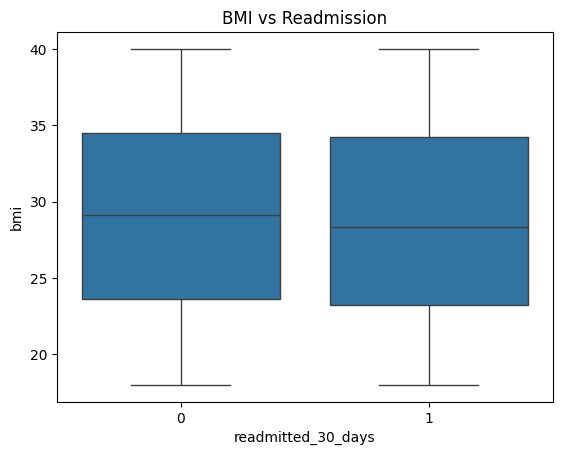

In [71]:
sns.boxplot(x='readmitted_30_days', y='bmi', data=df)
plt.title("BMI vs Readmission")
plt.show()

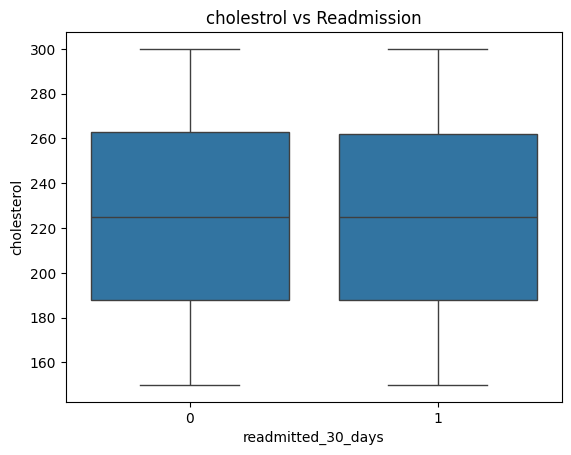

In [72]:
sns.boxplot(x='readmitted_30_days', y='cholesterol', data=df)
plt.title("cholestrol vs Readmission")
plt.show()

# Model

In [73]:
X = df.drop(['patient_id', 'readmitted_30_days', 'BpMax', 'BpMin'], axis=1)
y = df['readmitted_30_days']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Execution

In [74]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3505    2]
 [ 489    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      3507
           1       0.00      0.00      0.00       489

    accuracy                           0.88      3996
   macro avg       0.44      0.50      0.47      3996
weighted avg       0.77      0.88      0.82      3996



# Model working Key Classification Metrics
* Precision	0.80+ (or higher) we have 0.88 shows that % of predicted positives that were actually correct
* Recall	0.80+ ideally (or as high as possible) we have 1.00 which shows	% of actual positives (true readmissions) correctly found
* F1-Score	0.75–0.90 we have 0.93 which is bit more which has Balance between precision and recall
* Accuracy 80% – 90%	we have 88% Good – strong baseline for deployment

# Adding the prediction to the dataset / exporting the model

In [63]:
# Add predictions to test set
X_test['actual_readmitted'] = y_test.values
X_test['predicted_readmitted'] = y_pred

In [64]:
X_test.to_csv("readmission_prediction_results.csv", index=False)

In [65]:
df_final = df.copy()
df_final['predicted_readmitted'] = model.predict(X)
df_final.to_csv("final_readmission_dataset.csv", index=False)

# Thank you. See futhur analysis in power bi.